In [7]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class Myproblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var = 2,             #número de variáveis (x1,x2)
                         n_obj = 2,             #número de f_objetivos (f1,f2)
                         n_ieq_constr=2,        #número de restrições (g1,g2)
                         xl=np.array([-2,-2]),  #limites inferiores das variavéis
                         xu=np.array([2,2]))    #limites superiores das variáveis
        
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]     #objetivos
        out["G"] = [g1, g2]     #restrições

problem = Myproblem()

In [8]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
    pop_size=40,                            #tamanho da população inicial
    n_offsprings=10,                        #número de descendentes gerados a cada geração
    sampling=FloatRandomSampling(),         
    crossover=SBX(prob=0.9, eta=15),        #operador de cruzamento
    mutation=PM(eta=20),                    #operador de mutação
    eliminate_duplicates=True               #evita soluções duplicadas
)

In [9]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 40)      #parar após 40 gerações

In [12]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               save_history=True,
               verbose=True)        #para imprimir a evolução da pop

X = res.X       #soluções para as variaveis x1 e x2
F = res.F       #valores das funções obj f1 e f2

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  1.558059E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  4.9859807964 |  0.000000E+00 |             f
     3 |       60 |      1 |  0.000000E+00 |  1.4948648135 |  0.000000E+00 |             f
     4 |       70 |      2 |  0.000000E+00 |  0.3331283368 |  7.6488581522 |         ideal
     5 |       80 |      2 |  0.000000E+00 |  0.0259543391 |  2.5873171885 |         ideal
     6 |       90 |      3 |  0.000000E+00 |  0.0022691428 |  0.7844753703 |         ideal
     7 |      100 |      3 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      110 |      3 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      120 |      3 |  0.000000E+00 |  0.000000E+00 |  0.0120696953 |         ideal
    10 |      130 |      3 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

<function matplotlib.pyplot.show(close=None, block=None)>

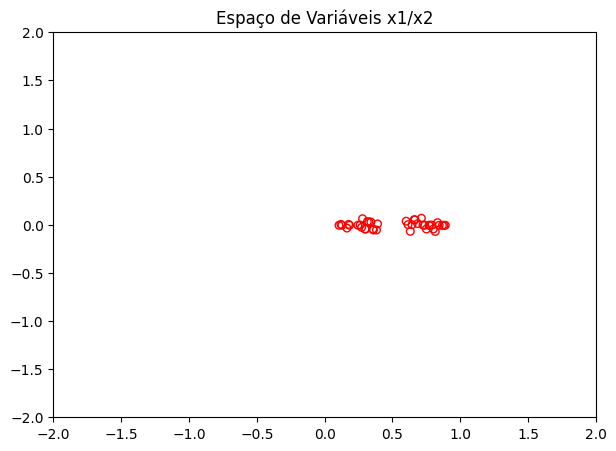

In [ ]:
import matplotlib.pyplot as plt

xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1],xu[1])
plt.title("Espaço de Variáveis")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

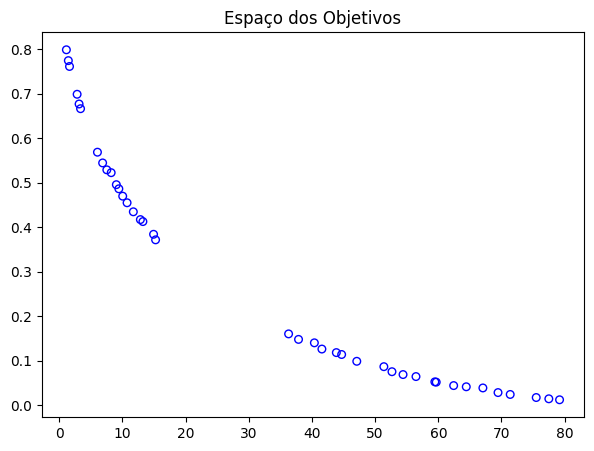

In [15]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Espaço dos Objetivos")
plt.show